In [25]:
import pandas as pd
import numpy as np
import os 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
eng_data = pd.read_csv('./data/E0.csv')

In [12]:
clubs = set(eng_data['HomeTeam'])
home_goals = list(eng_data['FTHG'])
away_goals = list(eng_data['FTAG'])
unique_results = set(['{}:{}'.format(goals[0], goals[1]) for goals in zip(home_goals, away_goals)])

In [23]:
results_for_club = dict.fromkeys(unique_results, 0)
results = dict.fromkeys(clubs)

for key in results.keys():
    results[key] = dict.fromkeys(['home', 'away'], dict.fromkeys(unique_results, 0))

# print(results)
for index, row in eng_data.iterrows():
    h_club = row['HomeTeam']
    a_club = row['AwayTeam']
    h_goals = row['FTHG']
    a_goals = row['FTAG']
    try:
        results[h_club]['home'][f'{h_goals}:{a_goals}'] += 1
    except:
        results[h_club]['home'][f'{h_goals}:{a_goals}'] = 0
    try:
        results[a_club]['away'][f'{h_goals}:{a_goals}'] += 1
    except:
        results[a_club]['away'][f'{h_goals}:{a_goals}'] = 0

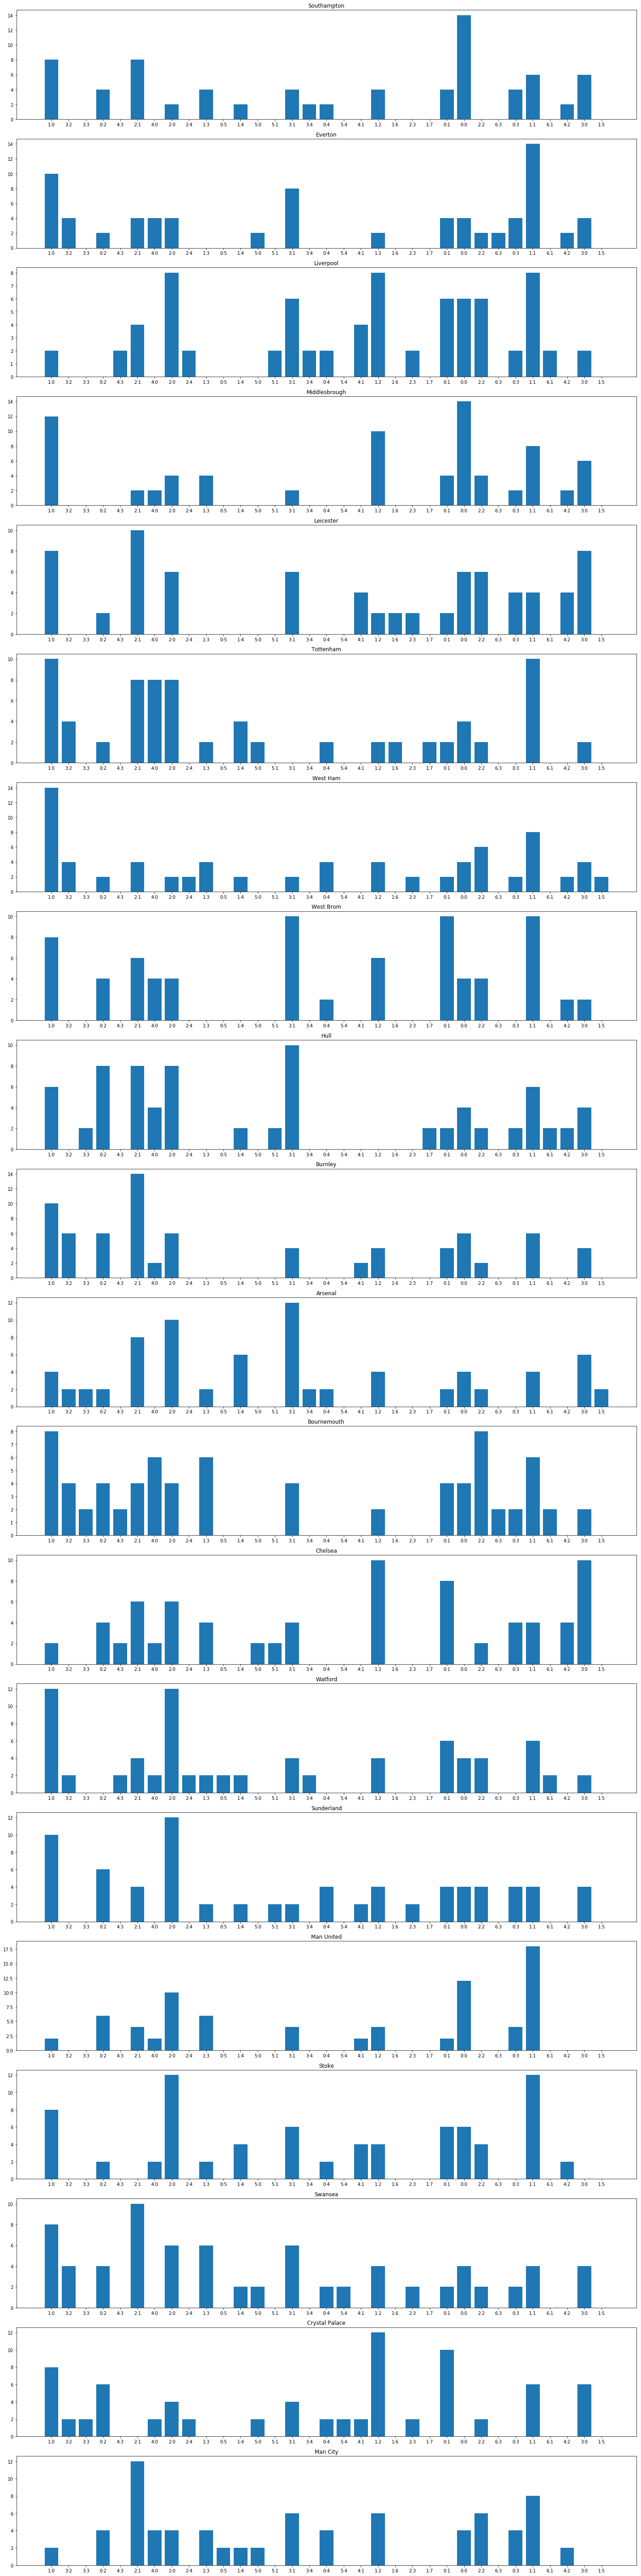

In [46]:
plt.figure(figsize=(20, 80))
for index, club in enumerate(results):
    x_axis = results[club]['home'].keys()
    away_values = list(results[club]['away'].values())
    home_values = list(results[club]['home'].values())
    all_values = [a + b for a, b in zip(home_values, away_values)]
    plt.subplot(20, 1, index+1)
    plt.bar(x_axis, all_values)
    plt.title(club)
plt.tight_layout()
    